# Blendvert Notebook #

##### This is based on the paper https://persci.mit.edu/pub_pdfs/spline83.pdf by P. J Burt and E. H. Adelson but in this example we will be using stack instead of pyramids and will be using the formula LSl(i, j) = GRl(i, j)LAl(i, j) + (1 - GRl(i, j))LBl(i, j) #####

In [20]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.exposure as exposure
from skimage.draw import ellipse

### Step la. Build Laplacian stack LA and LB for images A and B respectively ###

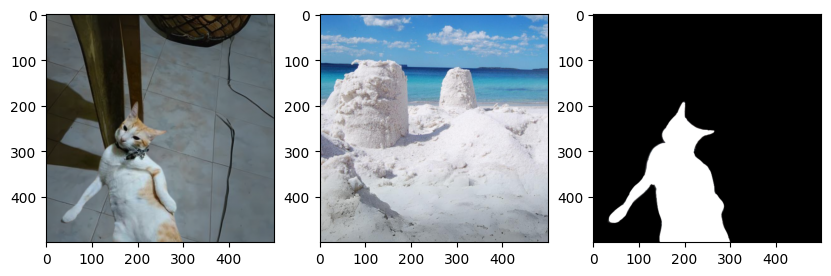

In [21]:
# import images A and B
# make them grayscale for now and resize them to 500x500
img_A = cv2.resize(cv2.imread("input/shino.png"), (500, 500))
img_B = cv2.resize(cv2.imread("input/beach.png"), (500, 500))
img_R = cv2.resize(cv2.imread("input/czy-mask.png"), (500, 500))

img_A = cv2.cvtColor(img_A, cv2.COLOR_BGR2RGB)
img_B = cv2.cvtColor(img_B, cv2.COLOR_BGR2RGB)
img_R = cv2.cvtColor(img_R, cv2.COLOR_BGR2RGB)

img_A = skimage.img_as_float(img_A)
img_B = skimage.img_as_float(img_B)
img_R = skimage.img_as_float(img_R)


# make the mask as well
# height, width = img_A.shape[:2]
# img_R = np.zeros((height, width)).astype(np.float32)
# img_R[:, :width // 2] = 1


# --- plotting
fig = plt.figure(figsize=(10, 7)) 
rows = 1
columns = 3
# ---

fig.add_subplot(rows, columns, 1)
plt.imshow(img_A)

fig.add_subplot(rows, columns, 2)
plt.imshow(img_B)

fig.add_subplot(rows, columns, 3)
plt.imshow(img_R, cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


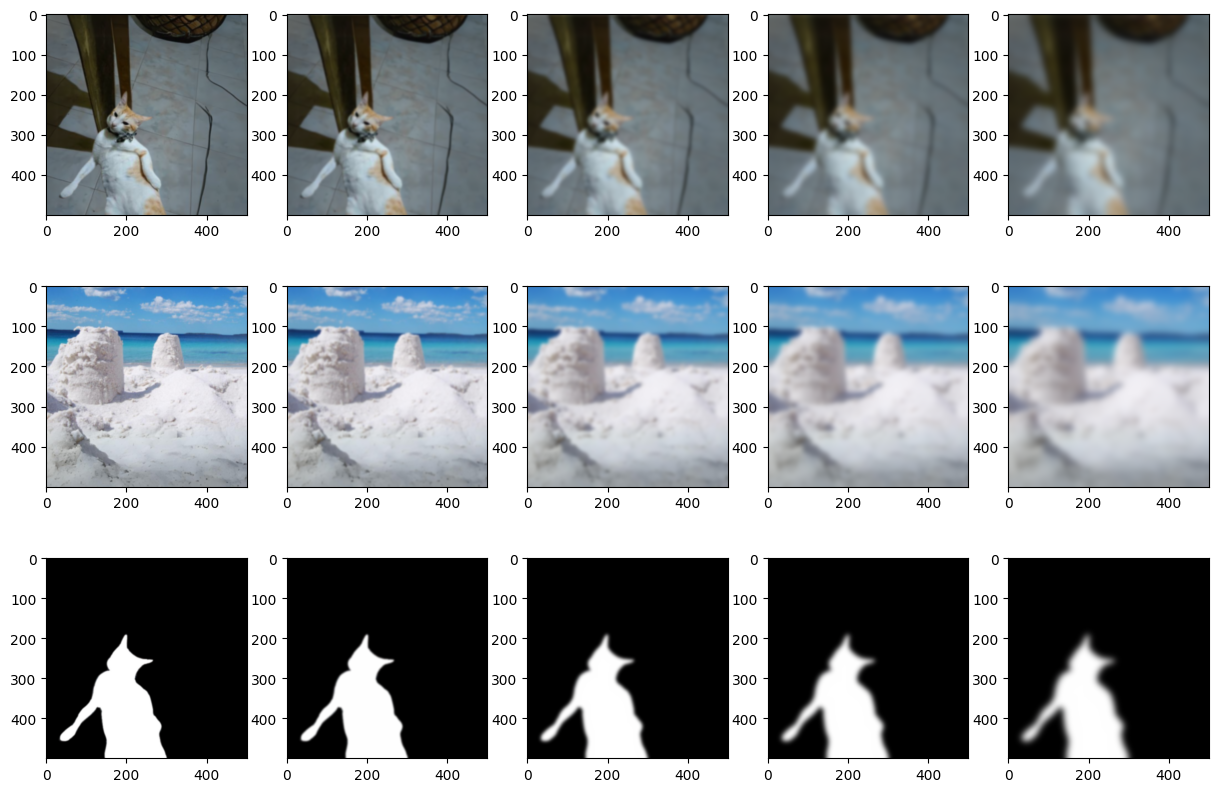

In [22]:
# Make a lowpass filter (gaussian blur) for the original images with varying sigma values to make the gaussian stack.
# The labels would be GR, GA and GB

# function for creating the gaussian stack
def makeGaussianStack(img, count=5, sigmaValues=[0,2,4,6,8]):
    _temp = []
    for i in range(count):
        if sigmaValues[i] > 0:
            ksize = [0, 0]  # If sigma is greater than 0
        else:
            ksize = (5, 5)  # If sigma is 0 or less

        # Applying Gaussian blur to the input image with the specified sigma value and kernel size
        blurred_img = cv2.GaussianBlur(img, ksize=ksize, sigmaX=sigmaValues[i])
        
        # Adding the blurred image to the list
        _temp.append(blurred_img)
    
    return _temp

img_GA = makeGaussianStack(img_A)
img_GB = makeGaussianStack(img_B)
img_GR = makeGaussianStack(img_R)

# --- plotting ---
fig = plt.figure(figsize=(15, 10)) 
rows = 3
columns = 5
curr_pos=1

for i in range(5):
    fig.add_subplot(rows, columns, curr_pos)
    plt.imshow(img_GA[i])
    curr_pos += 1

for i in range(5):
    fig.add_subplot(rows, columns, curr_pos)
    plt.imshow(img_GB[i])
    curr_pos += 1

for i in range(5):
    fig.add_subplot(rows, columns, curr_pos)
    plt.imshow(img_GR[i])
    curr_pos += 1
# ---

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

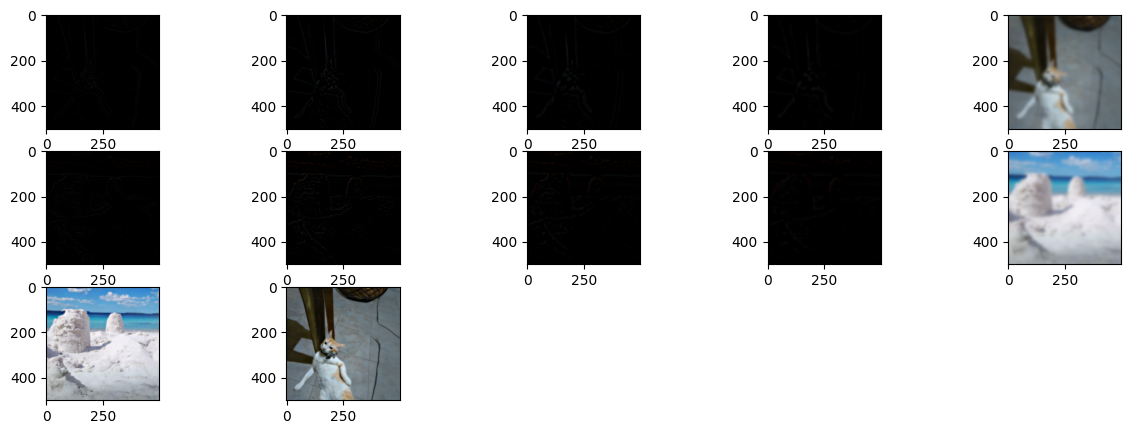

In [23]:
# make a laplacian stack from the gaussian stack created
def makeLaplacianStackfromGS(GS_img):
    _temp = []
    count = len(GS_img ) - 1
    for i in range(count):
        _temp.append(GS_img[i] - GS_img[i+1])

    _temp.append(GS_img[i])

    return _temp

img_LA = makeLaplacianStackfromGS(img_GA)
img_LB = makeLaplacianStackfromGS(img_GB)

# --- plotting ---
fig = plt.figure(figsize=(15, 5)) 
rows = 3
columns = 5
curr_pos=1

for i in range(5):
    fig.add_subplot(rows, columns, curr_pos)
    plt.imshow(img_LA[i])
    curr_pos += 1

for i in range(5):
    fig.add_subplot(rows, columns, curr_pos)
    plt.imshow(img_LB[i])
    curr_pos += 1

fig.add_subplot(rows, columns, curr_pos)
plt.imshow(sum(img_LB))

fig.add_subplot(rows, columns, curr_pos+1)
plt.imshow(sum(img_LA))


### Step 2. Form a combined stack LS from LA and LB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


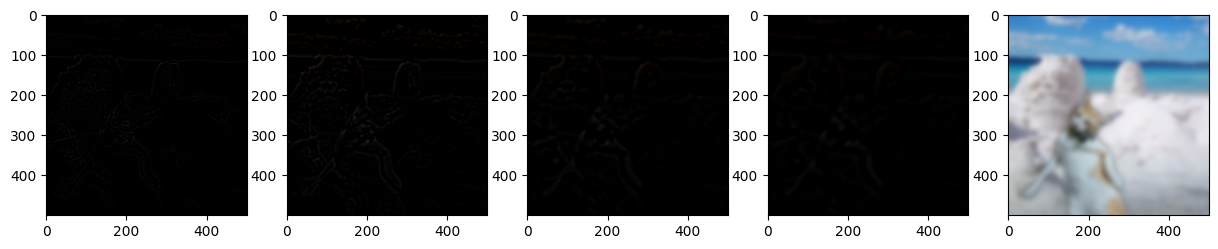

In [24]:
count = 5
img_LS = []

# --- plotting ---
fig = plt.figure(figsize=(15, 5)) 
rows = 1
columns = 5
curr_pos=1

for i in range(len(img_LA)):
    img_LS.append(((img_LA[i]*img_GR[i]) + (img_LB[i]*(1-img_GR[i]))))

for i in range(5):
    fig.add_subplot(rows, columns, curr_pos)
    plt.imshow(img_LS[i])
    curr_pos += 1

### Step 3. Obtain the splined image S by expanding and summing the levels of LS.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


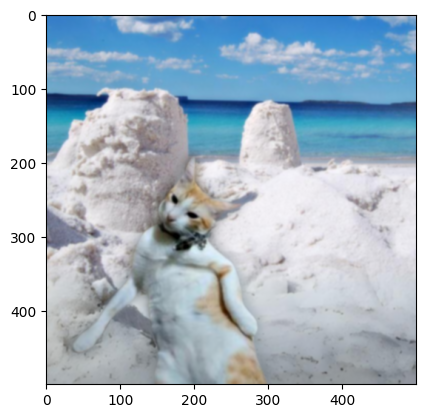

: 

In [26]:
img_S = sum(img_LS)

plt.imshow(img_S)
